In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

In [2]:
from sklearn.metrics import roc_auc_score

In [3]:
#crear diccionario para poder llamar llaves y hacer más fácil cuando duplique el modelo y cambie de train a test

In [31]:
train = pd.read_csv('z_train.csv')
test = pd.read_csv('z_test.csv')
data = {'train' : train, 'test' : test}

## Missing Data

### Train

In [34]:
key = 'train'
data[key].head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,21651,city_176,0.764,NaN,Has relevent experience,Part time course,Graduate,STEM,11,NaN,NaN,1,24,1.0


In [6]:
data[key].shape

(15326, 14)

In [7]:
data[key].info() #hipotesis: city_development_index y training_hours son las únicas variables continuas (sin enrollee_id) ---las demas son objetos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15326 entries, 0 to 15325
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             15326 non-null  int64  
 1   city                    15326 non-null  object 
 2   city_development_index  15326 non-null  float64
 3   gender                  11725 non-null  object 
 4   relevent_experience     15326 non-null  object 
 5   enrolled_university     15024 non-null  object 
 6   education_level         14957 non-null  object 
 7   major_discipline        13089 non-null  object 
 8   experience              15276 non-null  object 
 9   company_size            10592 non-null  object 
 10  company_type            10435 non-null  object 
 11  last_new_job            14987 non-null  object 
 12  training_hours          15326 non-null  int64  
 13  target                  15326 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [8]:
key = 'train'
data[key].isna().sum() / len(data[key])

enrollee_id               0.000000
city                      0.000000
city_development_index    0.000000
gender                    0.234960
relevent_experience       0.000000
enrolled_university       0.019705
education_level           0.024077
major_discipline          0.145961
experience                0.003262
company_size              0.308887
company_type              0.319131
last_new_job              0.022119
training_hours            0.000000
target                    0.000000
dtype: float64

## Test

In [9]:
key = 'test'
data[key].head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,23603,city_160,0.920,Male,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,1,78
1,22499,city_45,0.890,NaN,Has relevent experience,Full time course,High School,NaN,6,50-99,Pvt Ltd,1,36
2,10465,city_149,0.689,Male,No relevent experience,no_enrollment,Graduate,STEM,5,NaN,NaN,never,34
3,8293,city_67,0.855,Female,Has relevent experience,no_enrollment,Masters,STEM,9,1000-4999,Pvt Ltd,1,149
4,4246,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,16,50-99,Funded Startup,2,7


In [10]:
data[key].shape

(3832, 13)

In [11]:
data[key].info() #hipotesis: city_development_index y training_hours son las únicas variables continuas (sin enrollee_id) ---las demas son objetos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3832 entries, 0 to 3831
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             3832 non-null   int64  
 1   city                    3832 non-null   object 
 2   city_development_index  3832 non-null   float64
 3   gender                  2925 non-null   object 
 4   relevent_experience     3832 non-null   object 
 5   enrolled_university     3748 non-null   object 
 6   education_level         3741 non-null   object 
 7   major_discipline        3256 non-null   object 
 8   experience              3817 non-null   object 
 9   company_size            2628 non-null   object 
 10  company_type            2583 non-null   object 
 11  last_new_job            3748 non-null   object 
 12  training_hours          3832 non-null   int64  
dtypes: float64(1), int64(2), object(10)
memory usage: 389.3+ KB


In [12]:
key = 'test'
data[key].isna().sum() / len(data[key])

enrollee_id               0.000000
city                      0.000000
city_development_index    0.000000
gender                    0.236691
relevent_experience       0.000000
enrolled_university       0.021921
education_level           0.023747
major_discipline          0.150313
experience                0.003914
company_size              0.314196
company_type              0.325939
last_new_job              0.021921
training_hours            0.000000
dtype: float64

In [13]:
### llenar NULL train y test

In [14]:
data['train'] = data['train'].fillna('NULL')
data['test'] = data['test'].fillna('NULL')

In [15]:
n = {'train' : len(data['train']), 'test' : len(data['test'])}

In [16]:
n 

{'train': 15326, 'test': 3832}

In [17]:
#hipotesis: city_development_index y training_hours son las únicas variables continuas (sin enrollee_id) ---las demas son objetos
# para comprobar, tomare porcentaje de valores unicos

In [18]:
unique_df = {}

for key in data:
    unique_dict = {key_:
                       [
                        data[key][key_].nunique(),
                        data[key][key_].nunique() / n[key]
                       ]
                   for key_ in data[key].columns}

    aux = pd.DataFrame(unique_dict).transpose()
    aux.columns = ['n_unique', '%_unique']
    aux['n_unique'] = aux['n_unique'].astype(int)
    unique_df[key] = aux

In [19]:
key = 'test'
unique_df[key]

,n_unique,%_unique
enrollee_id,3832,1.000000
city,112,0.029228
city_development_index,83,0.021660
gender,4,0.001044
relevent_experience,2,0.000522
enrolled_university,4,0.001044
education_level,6,0.001566
major_discipline,7,0.001827
experience,23,0.006002
company_size,9,0.002349


In [20]:
key = 'train'
unique_df[key]

,n_unique,%_unique
enrollee_id,15326,1.000000
city,123,0.008026
city_development_index,93,0.006068
gender,4,0.000261
relevent_experience,2,0.000130
enrolled_university,4,0.000261
education_level,6,0.000391
major_discipline,7,0.000457
experience,23,0.001501
company_size,9,0.000587


In [21]:
# city 123? wtf? que no es categorica?

#data['train'].city.unique()

#city es categorica, pero esta horrible entonces no la usaré

In [22]:
#confirmo que son categóricas excepto training_hours y city_development_index

#experience tiene 23 valores, habrá que convertirlo a continua?

<AxesSubplot:>

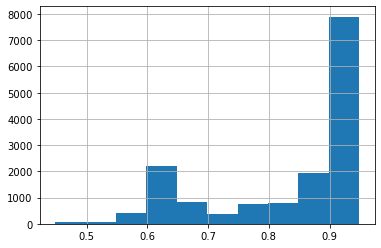

In [23]:
col = 'city_development_index'
data[key][col].hist()

<AxesSubplot:>

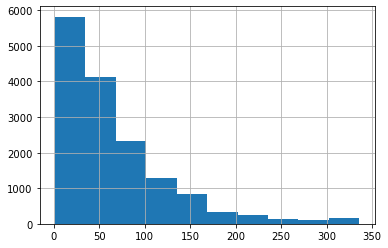

In [24]:
col = 'training_hours'
data[key][col].hist()

<AxesSubplot:>

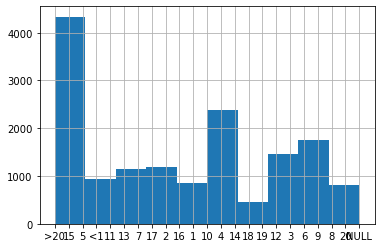

In [25]:
col = 'experience'
data[key][col].hist()

In [26]:
#porque funciona el hist para experience?

### Convertir Experience a una Variable Continua

In [27]:
for key in data:

    data[key]['experience'] = data[key]['experience'].apply(lambda x : 21 if x == '>20' else x)
    data[key]['experience'] = data[key]['experience'].apply(lambda x : 0 if x == '<1' else x)
    data[key]['experience'] = data[key]['experience'].apply(lambda x : 0 if x == 'NULL' else x)
    data[key]['experience'] = data[key]['experience'].astype(int)

In [28]:
# aux['experiencia'] = aux['experience'].apply(lambda x: 0 if x == 'NULL' else 1)
# aux['experiencia_relevante'] = aux['relevent_experience'].apply(lambda x : 0 if x == 'No relevent experience' else 1)

# y_actu = pd.Series(aux['experiencia_relevante'], name='experiencia_relevante')
# y_pred = pd.Series(aux['experiencia'], name='experiencia')
# df_confusion = pd.crosstab(y_actu, y_pred)

# df_confusion

<AxesSubplot:xlabel='experience', ylabel='Density'>

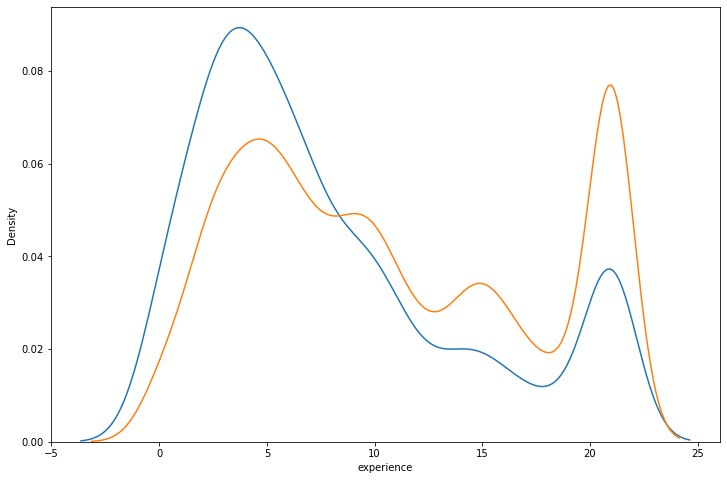

In [29]:
fig, ax = plt.subplots(figsize=(12, 8))
pos = data['train'][data['train']['target'] == 1] ##looking for a job change (azul)
neg = data['train'][data['train']['target'] == 0] ##not looking for a job change (naranja)
sns.kdeplot(pos['experience'])
sns.kdeplot(neg['experience'])

##entre mas experiencia, menos estan buscando un trabajo
##entre menos experiencia, mas estan buscando un trabajo

In [35]:
mean_target = data[key]['target'].mean()

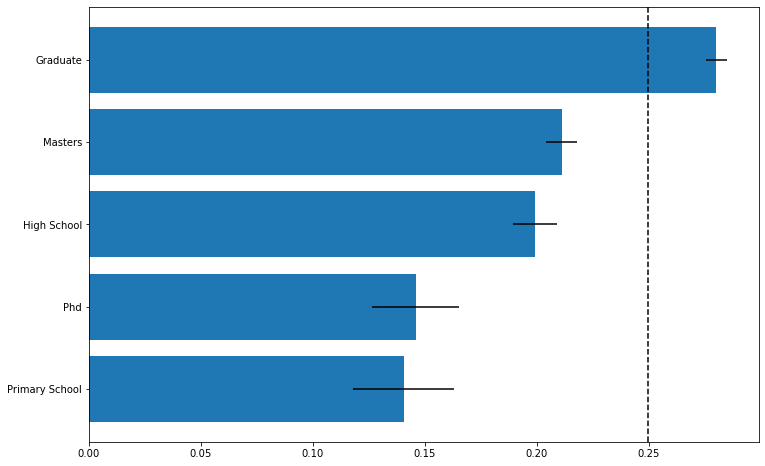

In [36]:
col = 'education_level'

agg = data[key].groupby(col)['target'].agg(['mean', 'std', 'count'])

agg = agg.sort_values(by='mean')

fig, ax = plt.subplots(figsize=(12, 8))
ax.barh(agg.index, agg['mean'], xerr=agg['std'] / np.sqrt(agg['count']))
ax.axvline(mean_target, color='black', linestyle='--')

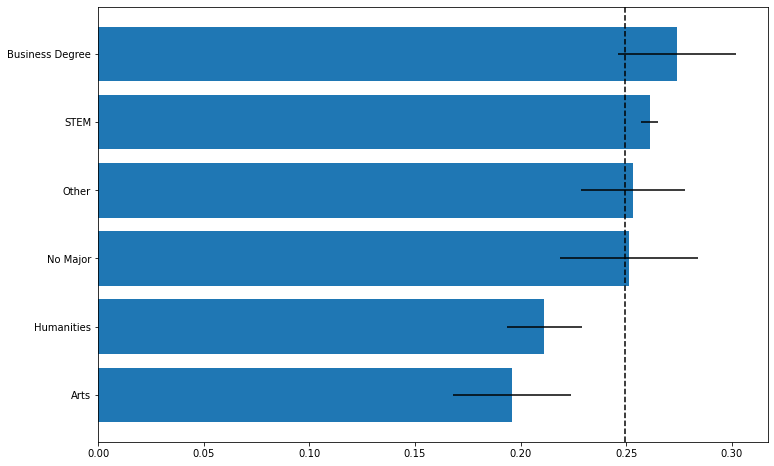

In [37]:
col = 'major_discipline'

agg = data[key].groupby(col)['target'].agg(['mean', 'std', 'count'])

agg = agg.sort_values(by='mean')

fig, ax = plt.subplots(figsize=(12, 8))
ax.barh(agg.index, agg['mean'], xerr=agg['std'] / np.sqrt(agg['count']))
ax.axvline(mean_target, color='black', linestyle='--')

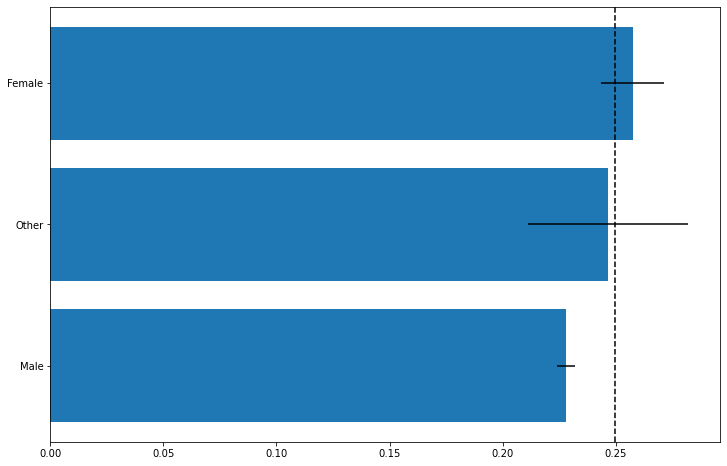

In [38]:
col = 'gender'

agg = data[key].groupby(col)['target'].agg(['mean', 'std', 'count'])

agg = agg.sort_values(by='mean')

fig, ax = plt.subplots(figsize=(12, 8))
ax.barh(agg.index, agg['mean'], xerr=agg['std'] / np.sqrt(agg['count']))
ax.axvline(mean_target, color='black', linestyle='--')

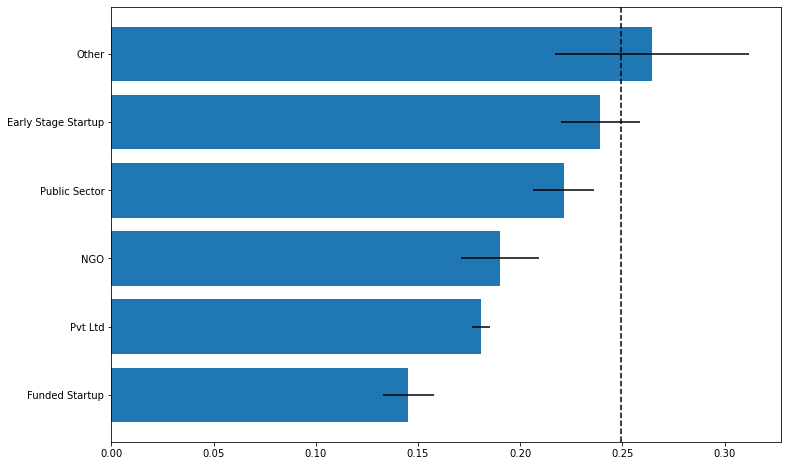

In [39]:
col = 'company_type'

agg = data[key].groupby(col)['target'].agg(['mean', 'std', 'count'])

agg = agg.sort_values(by='mean')

fig, ax = plt.subplots(figsize=(12, 8))
ax.barh(agg.index, agg['mean'], xerr=agg['std'] / np.sqrt(agg['count']))
ax.axvline(mean_target, color='black', linestyle='--')

In [40]:
# data['train']['company_size'] = data['train']['company_size'].apply(lambda x : 75 if x == '50-99' else x)
# data['train']['company_size'] = data['train']['company_size'].apply(lambda x : 350 if x == '100-500' else x)
# data['train']['company_size'] = data['train']['company_size'].apply(lambda x : 10000 if x == '10000+' else x)
# data['train']['company_size'] = data['train']['company_size'].apply(lambda x : 35 if x == '10/49' else x)
# data['train']['company_size'] = data['train']['company_size'].apply(lambda x : 3500 if x == '1000-4999' else x)
# data['train']['company_size'] = data['train']['company_size'].apply(lambda x : 5 if x == '<10' else x)
# data['train']['company_size'] = data['train']['company_size'].apply(lambda x : 750 if x == '500-999' else x)
# data['train']['company_size'] = data['train']['company_size'].apply(lambda x : 7500 if x == '5000-9999' else x)
# data['train']['company_size'] = data['train']['company_size'].apply(lambda x : None if x == 'NULL' else x)
# data['train']['company_size'] = data['train']['company_size'].fillna(data['train']['company_size'].mean())

# data['train']['company_size'] = data['train']['company_size'].astype(int)

# fig, ax = plt.subplots(figsize=(12, 8))
# pos = data['train'][data['train']['target'] == 1]
# neg = data['train'][data['train']['target'] == 0]
# sns.kdeplot(pos['company_size'])
# sns.kdeplot(neg['company_size'])

## Model

In [41]:
X_train, X_test, y_train, y_test = train_test_split(data['train'].drop('target', 1), data['train']['target'],
                                                    test_size=0.2, random_state=21045)

/var/folders/8s/vcwxyvv93jlbc3gkwsvl2xtm0000gn/T/ipykernel_12334/2798608303.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_train, X_test, y_train, y_test = train_test_split(data['train'].drop('target', 1), data['train']['target'],


In [42]:
numerical = ['city_development_index', 'training_hours', 'experience']
categorical = ['education_level', 'gender', 'company_type', 'major_discipline']

In [43]:
# continuas = ['m2 construidos', 'recamaras', 'estacionamientos', 'banios', 'medio banio', 'elevador', 'antiguedad',
#              'av_cercanas',  'farmacias',
#             ]
standard_scaler = StandardScaler()

# categoricas = ['colonia']

ohe = OneHotEncoder(handle_unknown="ignore")
# ohe = OneHotEncoder(handle_unknown="error", drop='first')

preprocesador = ColumnTransformer(
    transformers=[
        ("con", standard_scaler, numerical),
        ("cat", ohe, categorical),
    ]
)

In [44]:
modelo = LogisticRegression(random_state=21045, penalty='l1', solver='liblinear')

parametros = {
              'model__C': [0.5, 0.75, 1, 1.25, 1.5]                         
             }

In [45]:
pipe = Pipeline(steps=[("pre", preprocesador), ("model", modelo)])

In [46]:
grid = GridSearchCV(pipe, parametros, n_jobs=2)

In [48]:
grid.fit(X_train, y_train)
print('Modelo entrenado.')

/Users/analuciagonzalez/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
25 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/analuciagonzalez/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/analuciagonzalez/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py", line 390, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/Users/analuciagonzalez/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py", line 348, i

ValueError: could not convert string to float: '>20'

In [49]:
grid.best_params_

{'model__C': 0.5}

In [50]:
y_pred = grid.best_estimator_.predict(X_train)
y_pred = pd.Series(y_pred, name='Pred')

y_true = np.array(y_train)
y_true = pd.Series(y_true, name='True')

df_confusion = pd.crosstab(y_true, y_pred)
df_confusion

AttributeError: 'ColumnTransformer' object has no attribute 'transformers_'

In [51]:
y_prob = grid.best_estimator_.predict_proba(X_train)
roc_auc_score(y_true, y_prob[:, 1])

AttributeError: 'ColumnTransformer' object has no attribute 'transformers_'

In [52]:
roc_auc_score(y_true, y_pred)

NameError: name 'y_true' is not defined

In [287]:
y_pred = grid.best_estimator_.predict(X_test)
y_pred = pd.Series(y_pred, name='Pred')

y_true = np.array(y_test)
y_true = pd.Series(y_true, name='True')

df_confusion = pd.crosstab(y_true, y_pred)
df_confusion

Pred,0.0,1.0
True,,
0.0,2194,155
1.0,540,177


In [288]:
y_prob = grid.best_estimator_.predict_proba(X_test)
roc_auc_score(y_true, y_prob[:, 1])

0.7781651944831862

In [289]:
roc_auc_score(y_true, y_pred)

0.5904381994652759

## Submission

In [304]:
submission_csv = data['test'].copy()

# submission_csv['target'] = grid.best_estimator_.predict(submission_csv)
submission_csv['target'] = grid.best_estimator_.predict_proba(submission_csv)[:, 1]

submission_csv = submission_csv[['enrollee_id', 'target']]
submission_csv = submission_csv.set_index('enrollee_id')

In [306]:
submission_csv.to_csv('submission.csv')